In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
sys.path.append('..')

In [11]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

In [53]:
def probability_age(c,e):
    return (((1-c)/(1-e))*(1/c) + 1)**-1

In [3]:
dict_regions_states = {11: 'RN',12:'RN',13:'RN',14:'RN',15:'RN',16:'RN', 17: 'RN',
                      21:'RNE',22:'RNE',23:'RNE',24:'RNE',25:'RNE',26:'RNE',27:'RNE',28:'RNE', 29:'RNE',
                      50:'RCO',51:'RCO',52:'RCO',53:'RCO',
                      31:'RSE',32:'RSE',33:'RSE',35:'RSE',
                      41:'RS',42:'RS',43:'RS'}

In [9]:
regions = ['RN','RNE','RCO','RSE','RS']

In [4]:
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')

In [5]:
df_mun['state'] = df_mun['ID_MN_RESI'].astype(str).str[:2]

In [6]:
df_mun = df_mun.dropna()

In [7]:
df_mun['state'] = df_mun['state'].astype(int)

In [8]:
df_mun['region'] = df_mun['state'].replace(dict_regions_states)

## Estimating cover in each region

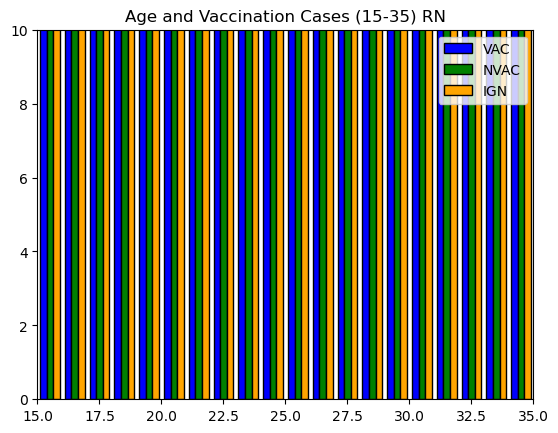

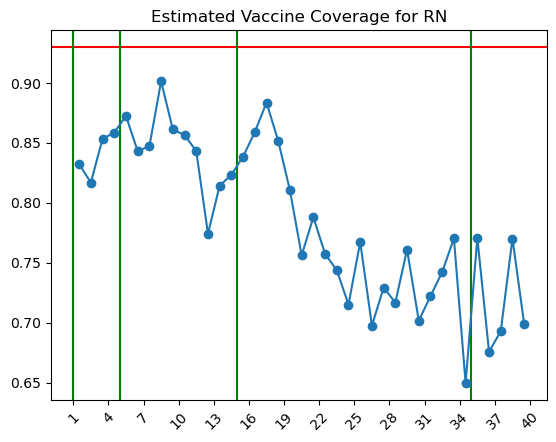

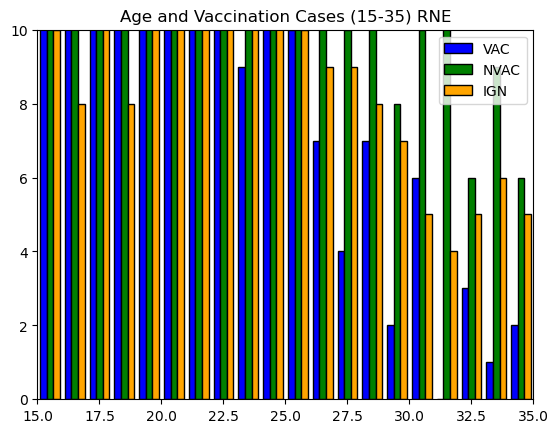

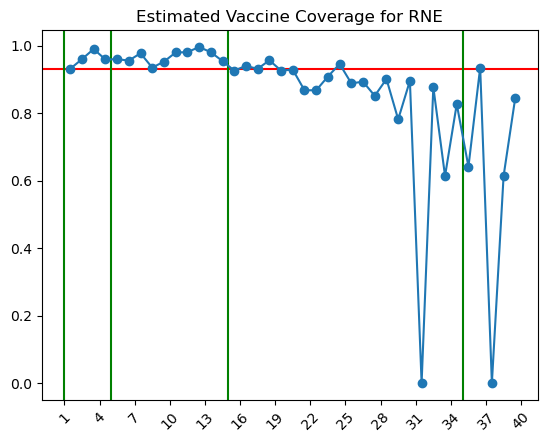

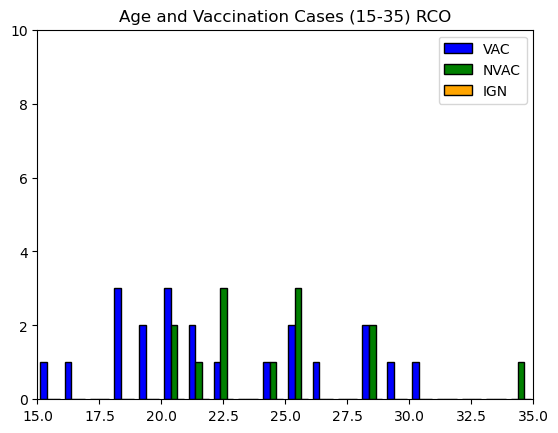

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_10924\3782610738.py:24: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


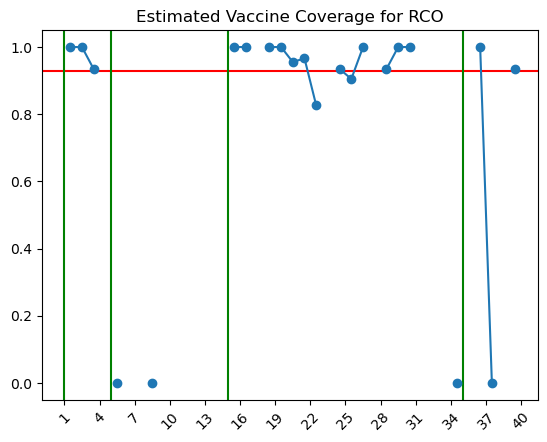

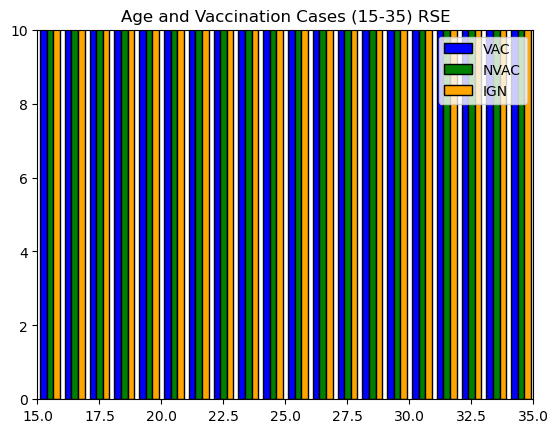

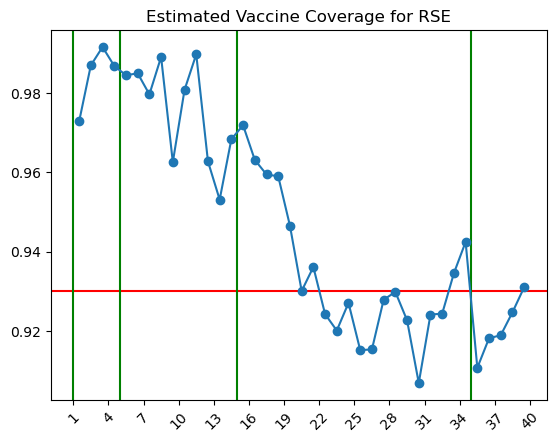

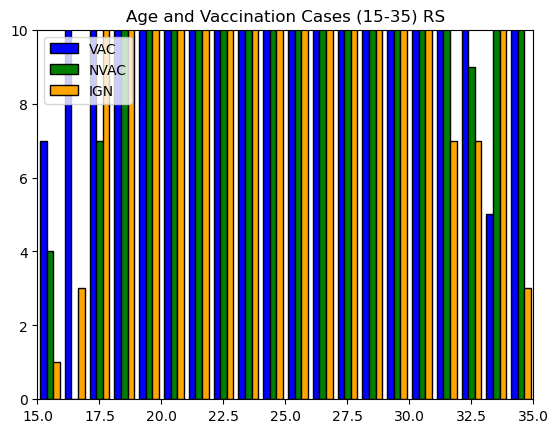

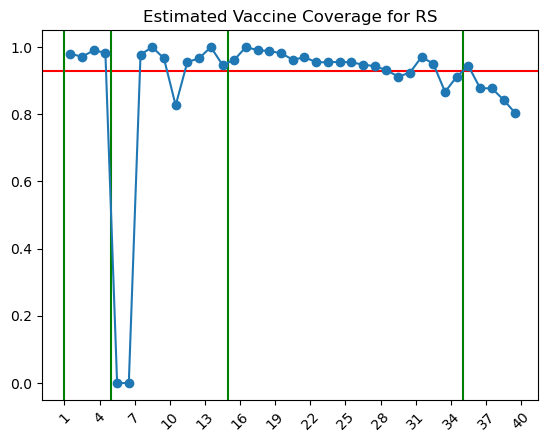

In [12]:
for region in regions:
    df_tmp = df_mun[df_mun['region'] == region]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['region'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    plt.xlim((15,35))
    plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(1,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][1:-1] + 0.5,c_vacs,'-o')
    plt.show()

## Comparing with official cover data

In [48]:
# Importing the official data
df_1 = pd.read_csv('../Data/CV_TP_1_REG.csv', encoding='cp1252', delimiter = ';', decimal = ',') 
df1_regions = df_1['RegiÃ£o'].to_numpy()[:-1]
df1_years = np.arange(1999,2023)
df_1_values = df_1[df_1.keys()[1:-2]]
df_1_values = df_1_values.drop(df_1_values.tail(1).index) 
df_1_values = df_1_values.iloc[: , 1:]
df_1_values['region'] = ['RN','RNE','RSE','RS','RCO']
df_1_values = df_1_values[['region','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022']]

In [49]:
df_1 = df_1_values.copy()

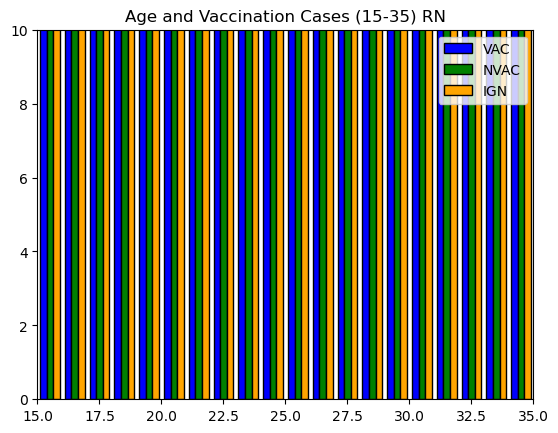

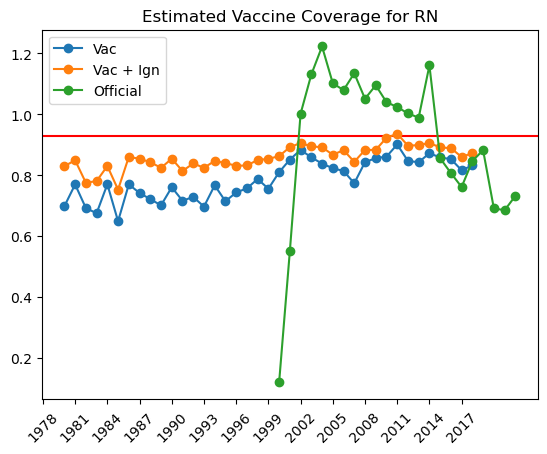

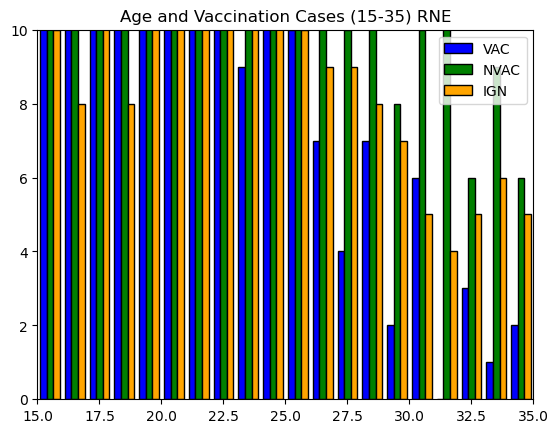

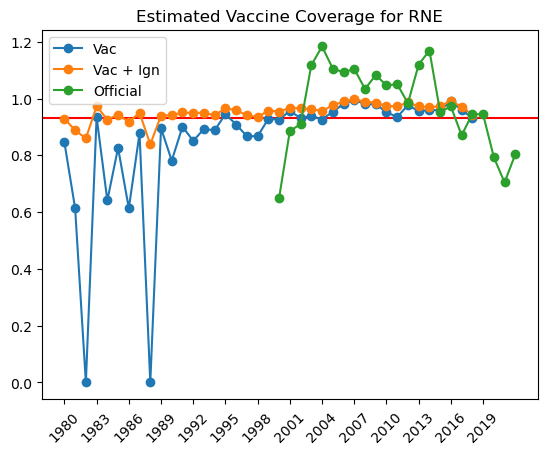

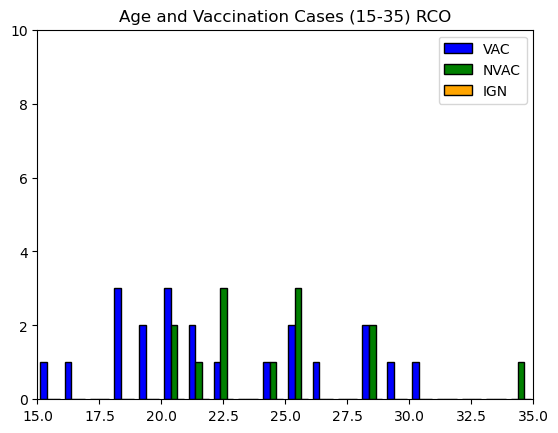

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_10924\2800353635.py:28: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)
C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_10924\2800353635.py:29: RuntimeWarning: invalid value encountered in divide
  p_vacs_2 = vacs_2/(vacs_2 + nvacs)


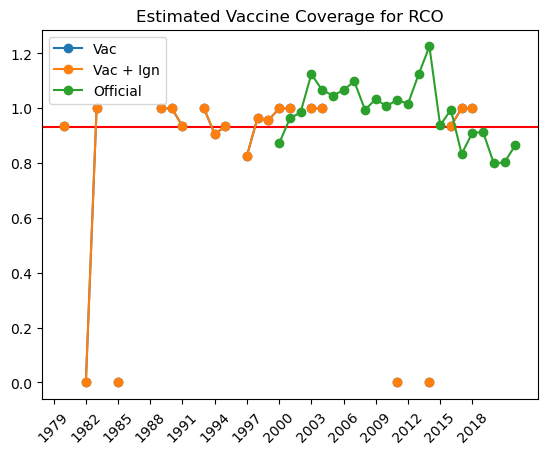

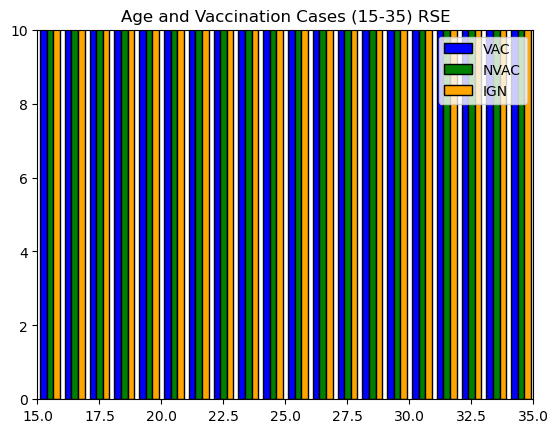

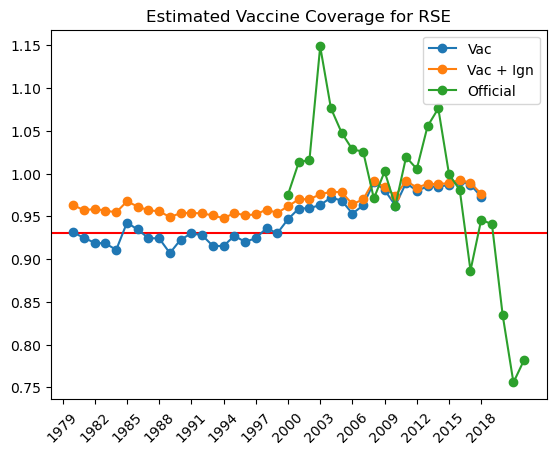

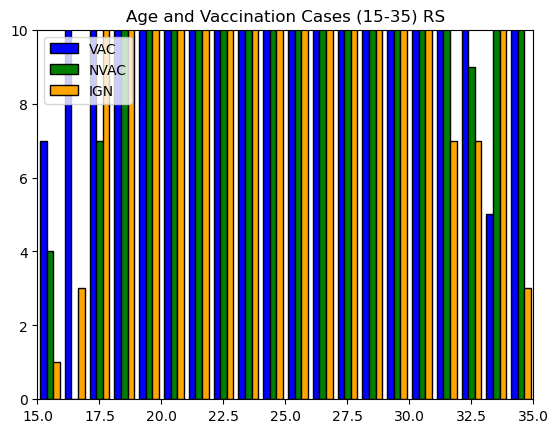

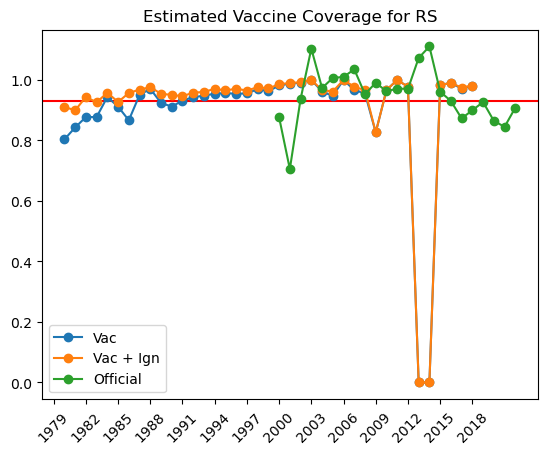

In [52]:
region_years = [2018,2020,2019,2019,2019]
i = 0
for region in regions:
    df_tmp = df_mun[df_mun['region'] == region]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['region'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    plt.xlim((15,35))
    plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    vacs = vacs 
    vacs_2 = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    p_vacs_2 = vacs_2/(vacs_2 + nvacs)
    c_vacs = []
    c_vacs_2 = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    for p in p_vacs_2:
        if(p == np.nan):
            c_vacs_2.append(np.nan)
        elif(p == 0):
            c_vacs_2.append(0)
        else:
            c_vacs_2.append(coverage_age(p,0.93))        
    plt.xticks(region_years[i] - np.arange(1,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(2019 - bins[1][1:-1],c_vacs,'-o', label = 'Vac')
    plt.plot(2019 - bins[1][1:-1],c_vacs_2,'-o', label = 'Vac + Ign')
    # plotting official data
    df_1_tmp = df_1[df_1['region'] == region]
    df_1_tmp = df_1_tmp.drop(columns = 'region')
    plt.plot(np.arange(2000,2023,1),df_1_tmp.T/100,'-o',label = 'Official')
    plt.legend()
    plt.show()
    i = i+1

## Comparing with expected value

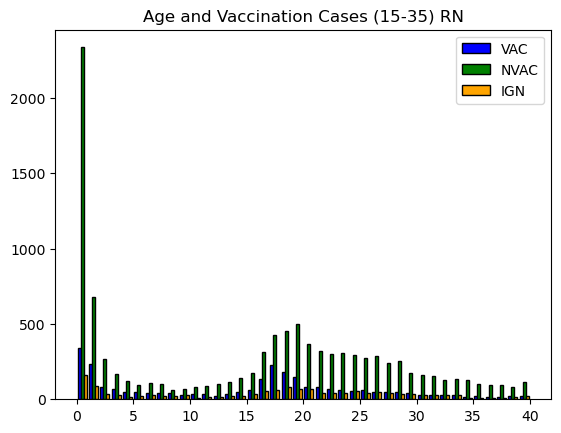

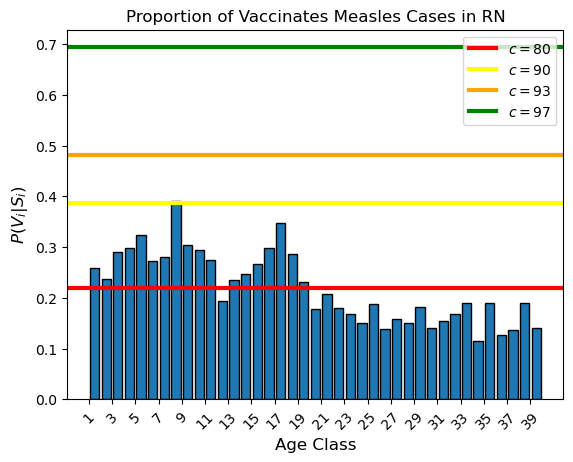

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


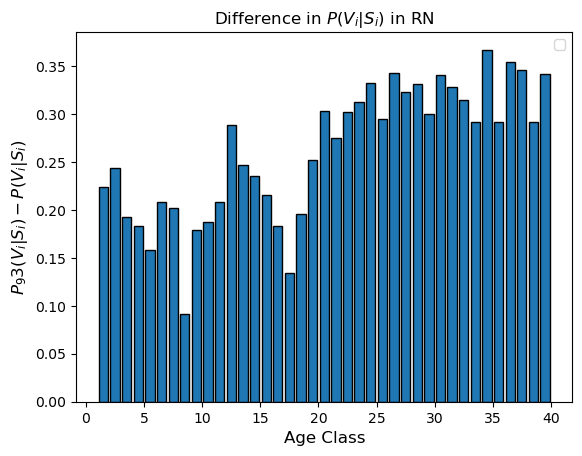

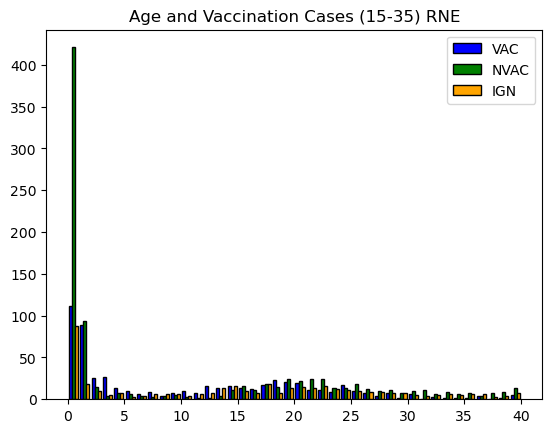

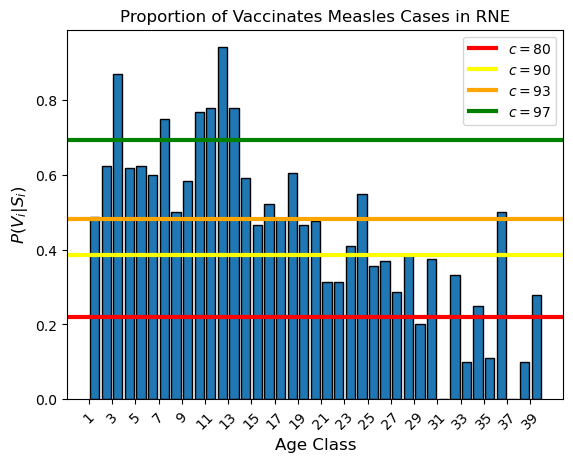

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


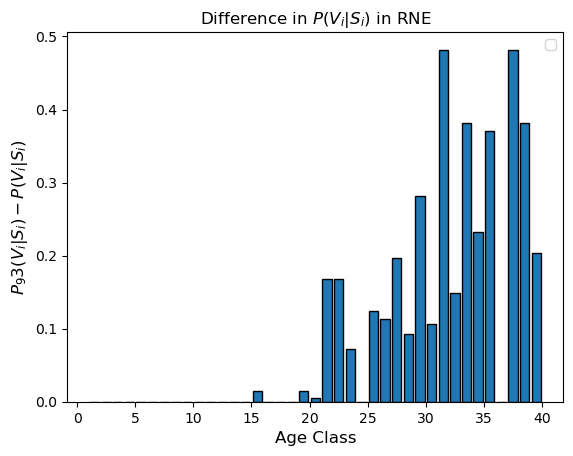

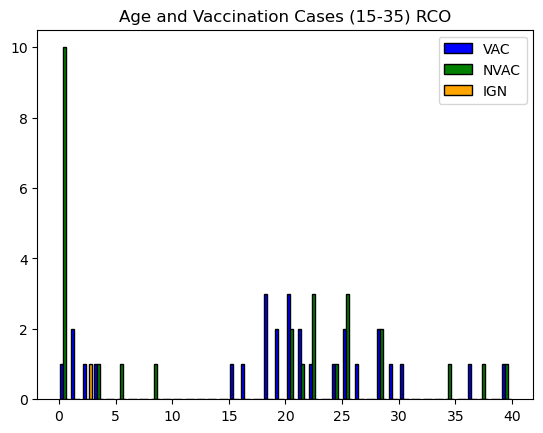

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_10924\2770696851.py:24: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


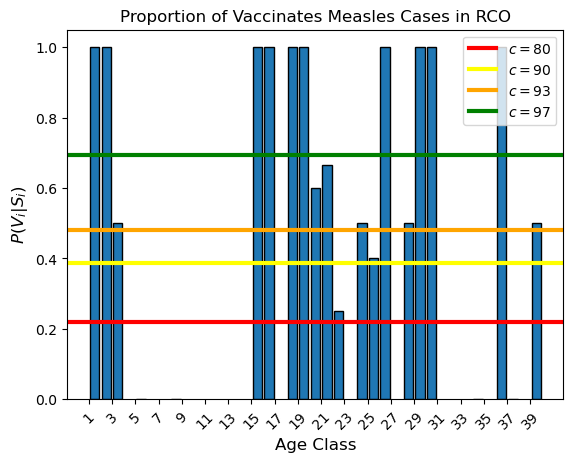

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


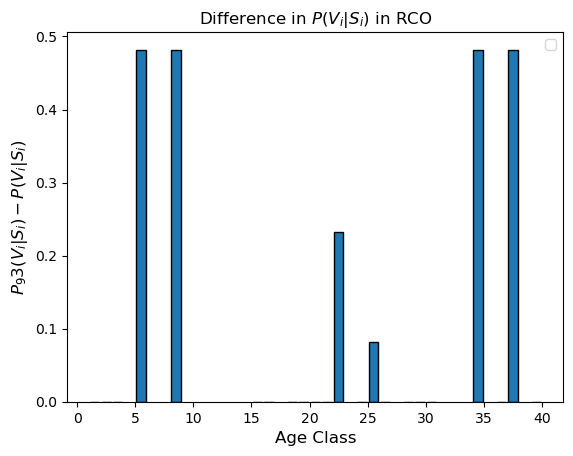

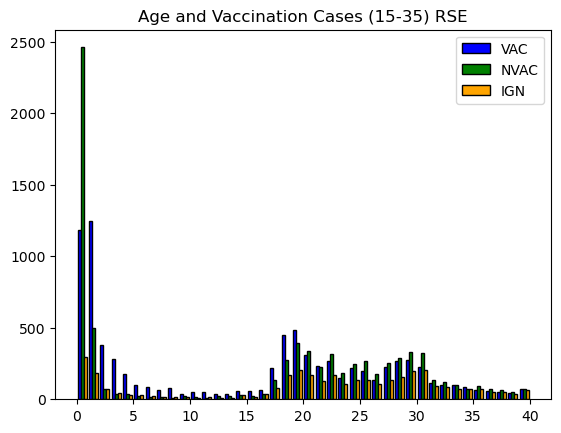

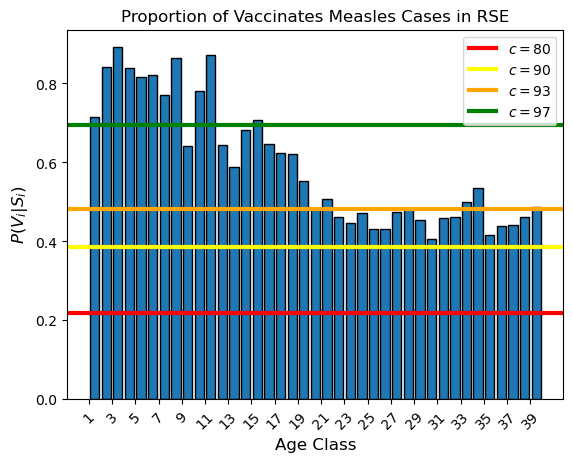

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


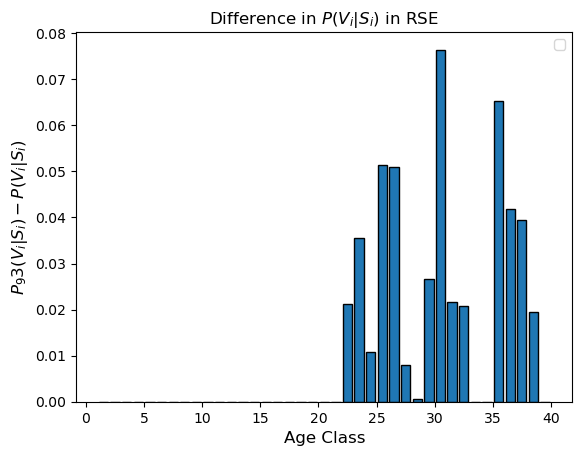

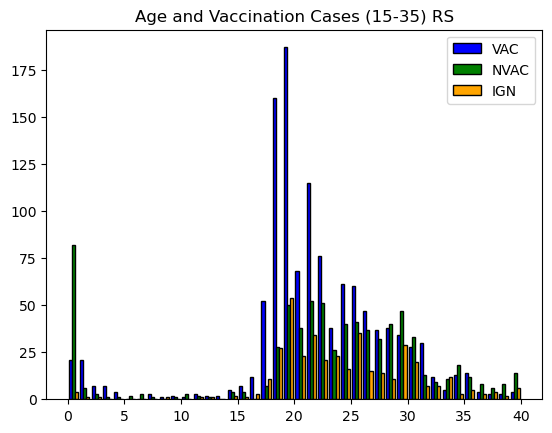

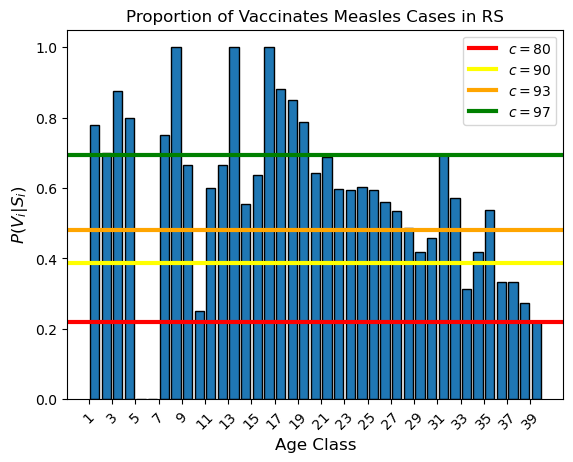

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


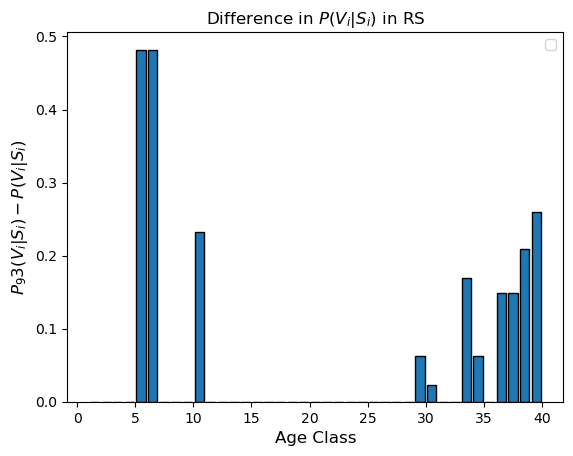

In [56]:
for region in regions:
    df_tmp = df_mun[df_mun['region'] == region]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['region'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    p_vacs_93 = (probability_age(0.93,0.93))
    p_vacs_90 = (probability_age(0.9,0.93))
    p_vacs_80 = (probability_age(0.80,0.93))
    p_vacs_97 = (probability_age(0.97,0.93))
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_vacs, edgecolor = 'k')
    plt.axhline(p_vacs_80, color ='red', linewidth = 3, label = r'$c = 80%$')
    plt.axhline(p_vacs_90, color = 'yellow', linewidth = 3, label = r'$c = 90%$')
    plt.axhline(p_vacs_93, color = 'orange', linewidth = 3, label = r'$c = 93%$')
    plt.axhline(p_vacs_97, color = 'green', linewidth = 3, label = r'$c = 97%$')
    plt.xticks(np.arange(1,max_age,2), rotation = 45)
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Proportion of Vaccinates Measles Cases in '+mun_name)
    plt.legend()
    plt.show()
    p_excess = p_vacs_93 - p_vacs
    f = lambda x: 0 if x < 0 else x
    p_excess = [f(i) for i in p_excess]
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_excess, edgecolor = 'k')
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P_93(V_{i}|S_i) - P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Difference in '+r'$P(V_i|S_i)$ '+'in '+mun_name)
    plt.legend()
    plt.show()

### Repeating including ignored cases (best case scenario: all ignored are vaccinated)

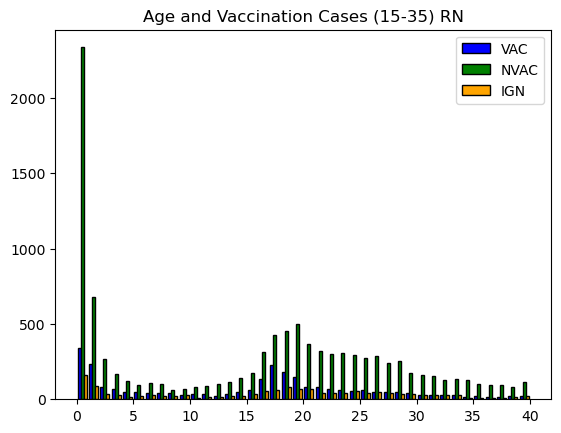

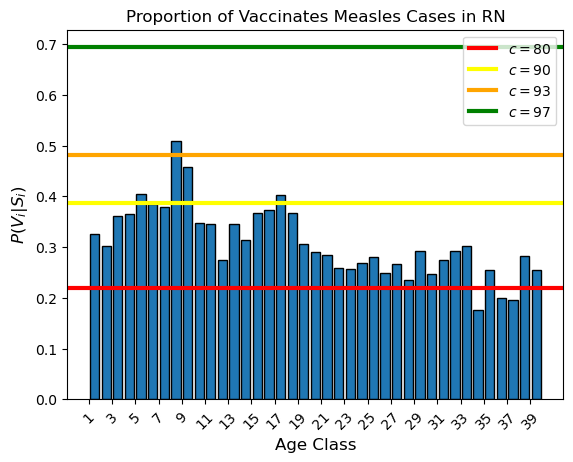

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


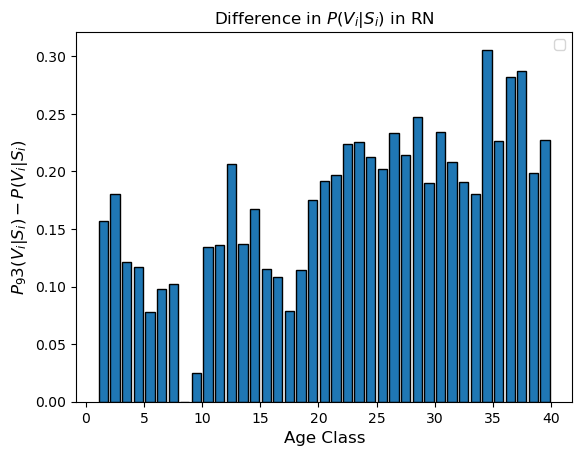

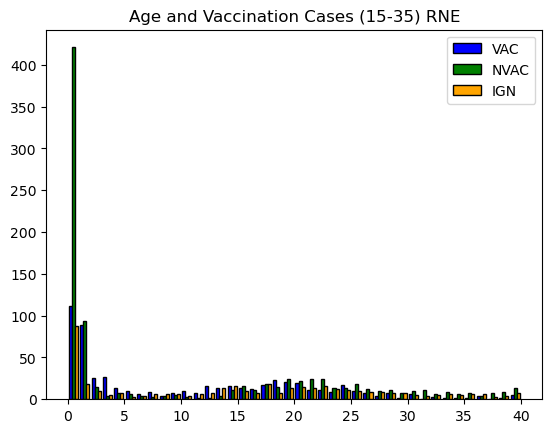

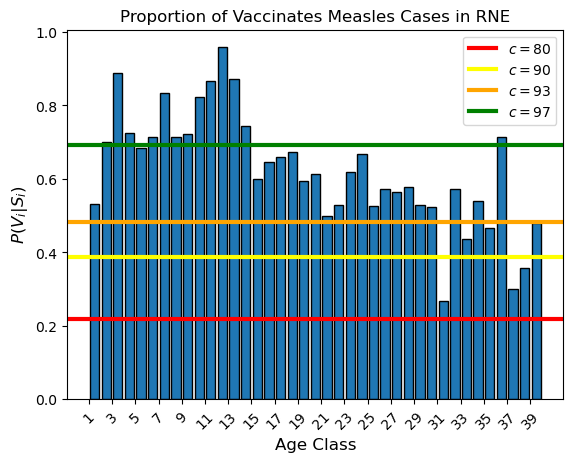

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


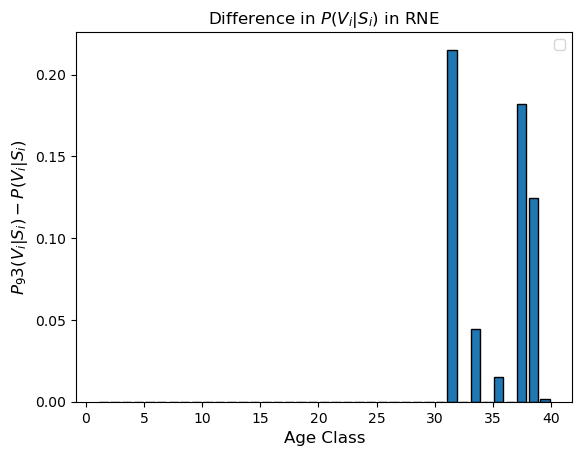

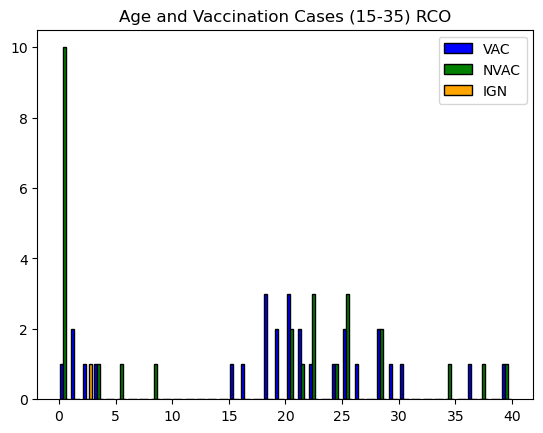

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_10924\559559583.py:25: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


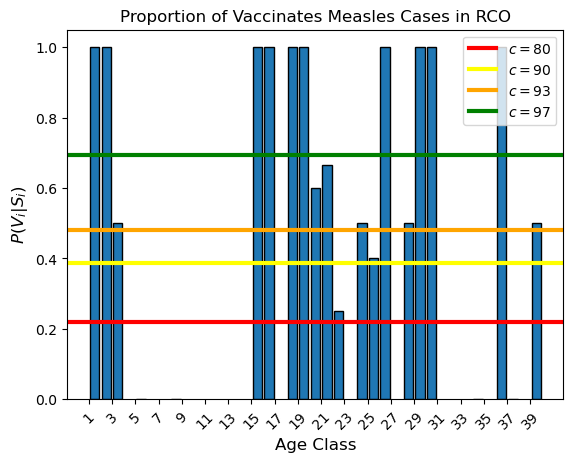

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


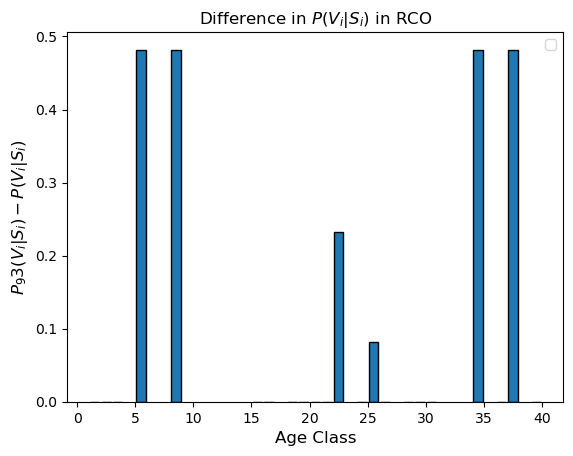

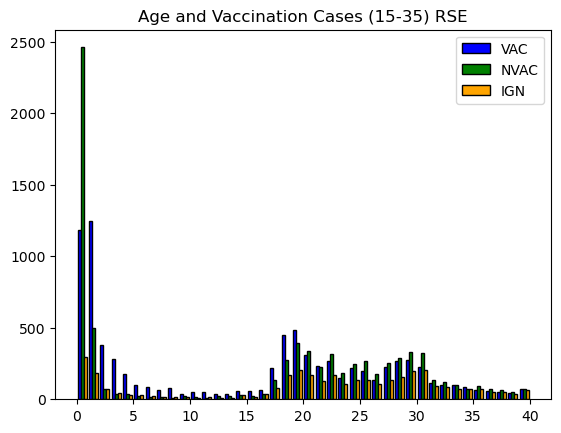

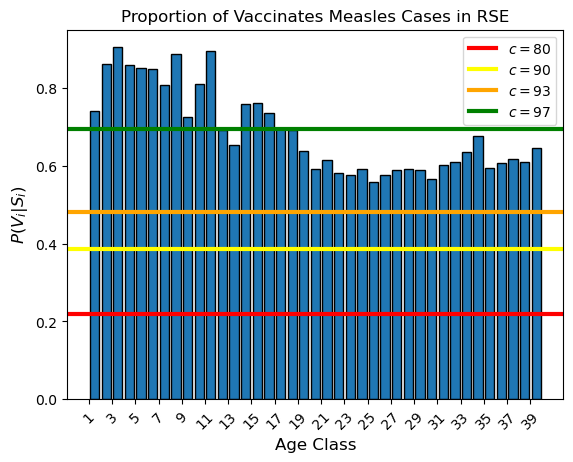

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


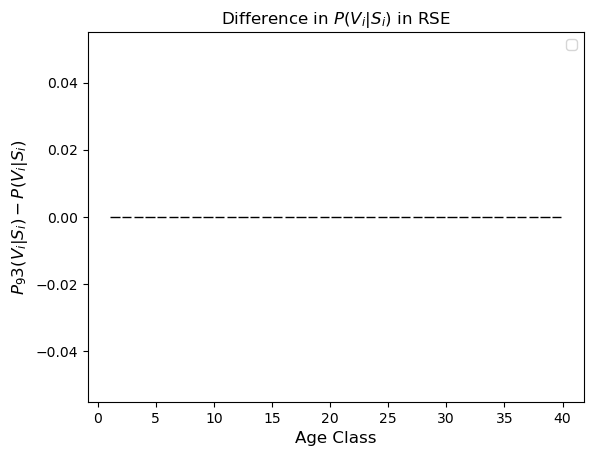

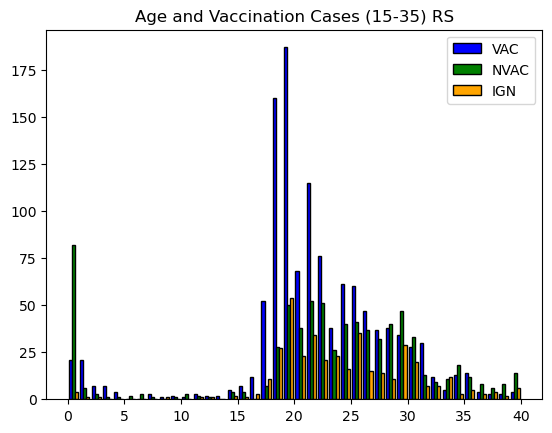

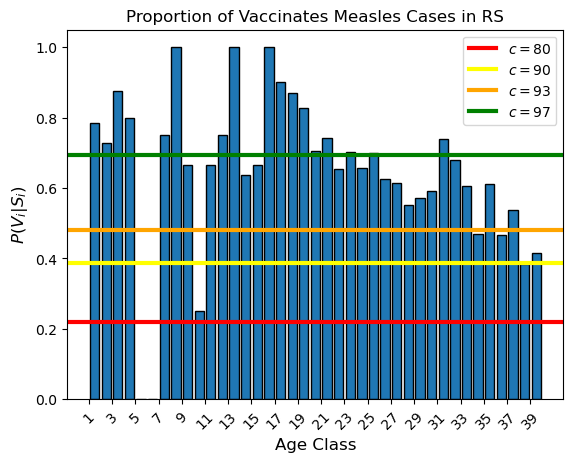

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


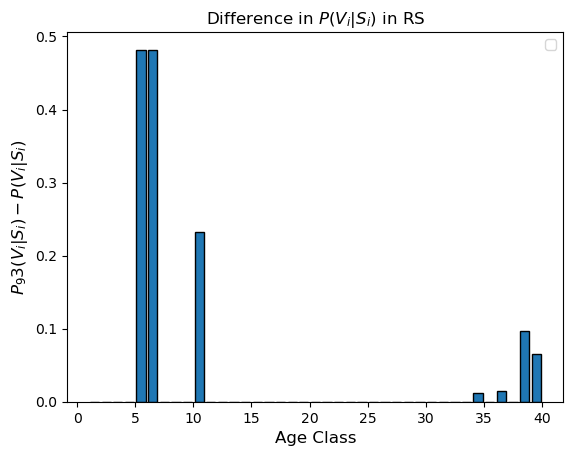

In [57]:
for region in regions:
    df_tmp = df_mun[df_mun['region'] == region]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['region'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs = vacs[1:]
    nvacs = nvacs[1:]
    ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    p_vacs_93 = (probability_age(0.93,0.93))
    p_vacs_90 = (probability_age(0.9,0.93))
    p_vacs_80 = (probability_age(0.80,0.93))
    p_vacs_97 = (probability_age(0.97,0.93))
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_vacs, edgecolor = 'k')
    plt.axhline(p_vacs_80, color ='red', linewidth = 3, label = r'$c = 80%$')
    plt.axhline(p_vacs_90, color = 'yellow', linewidth = 3, label = r'$c = 90%$')
    plt.axhline(p_vacs_93, color = 'orange', linewidth = 3, label = r'$c = 93%$')
    plt.axhline(p_vacs_97, color = 'green', linewidth = 3, label = r'$c = 97%$')
    plt.xticks(np.arange(1,max_age,2), rotation = 45)
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Proportion of Vaccinates Measles Cases in '+mun_name)
    plt.legend()
    plt.show()
    p_excess = p_vacs_93 - p_vacs
    f = lambda x: 0 if x < 0 else x
    p_excess = [f(i) for i in p_excess]
    plt.bar(np.arange(1,max_age,1) + 0.5,height = p_excess, edgecolor = 'k')
    plt.xlabel('Age Class', fontsize = 12)
    plt.ylabel(r'$P_93(V_{i}|S_i) - P(V_{i}|S_i)$', fontsize = 12)
    plt.title('Difference in '+r'$P(V_i|S_i)$ '+'in '+mun_name)
    plt.legend()
    plt.show()